In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [98]:
dataset = pd.read_csv('/content/winequality-red.csv')

In [99]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [100]:
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [101]:
dataset.size

19188

In [102]:
dataset.shape

(1599, 12)

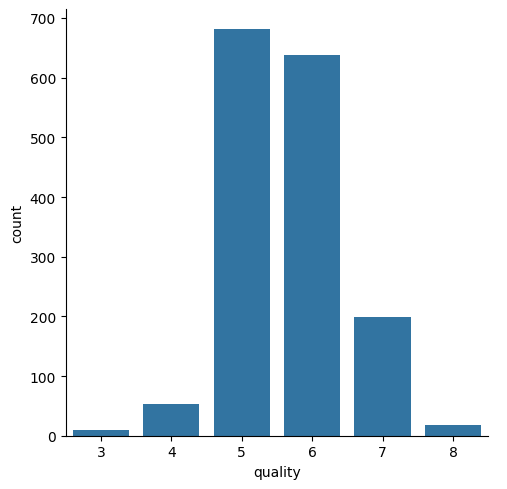

In [103]:
sns.catplot(x='quality',data=dataset,kind='count')

<Axes: xlabel='quality', ylabel='alcohol'>

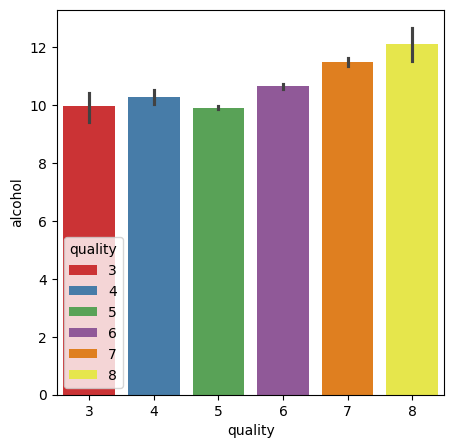

In [104]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',hue='quality',data=dataset,palette='Set1')

<Axes: xlabel='quality', ylabel='citric acid'>

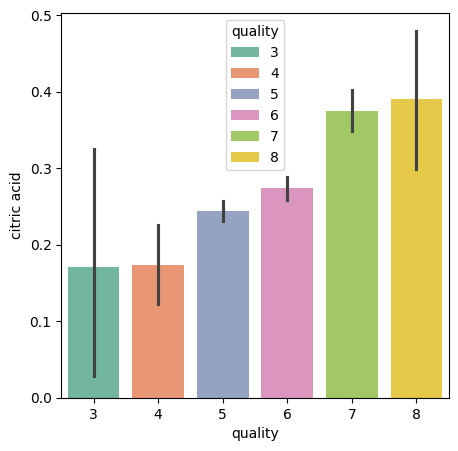

In [105]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',hue='quality',y='citric acid',data=dataset,palette='Set2')

<Axes: xlabel='quality', ylabel='volatile acidity'>

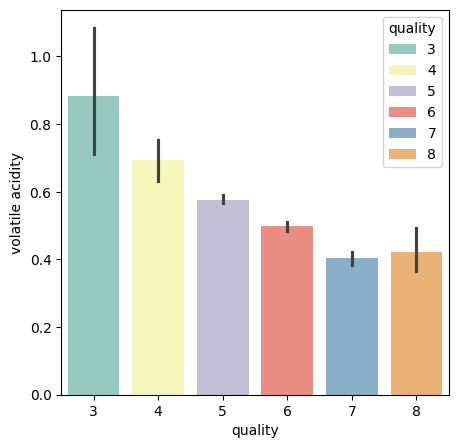

In [106]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',hue='quality',data=dataset,palette='Set3')

In [107]:
correlation = dataset.corr()

<Axes: >

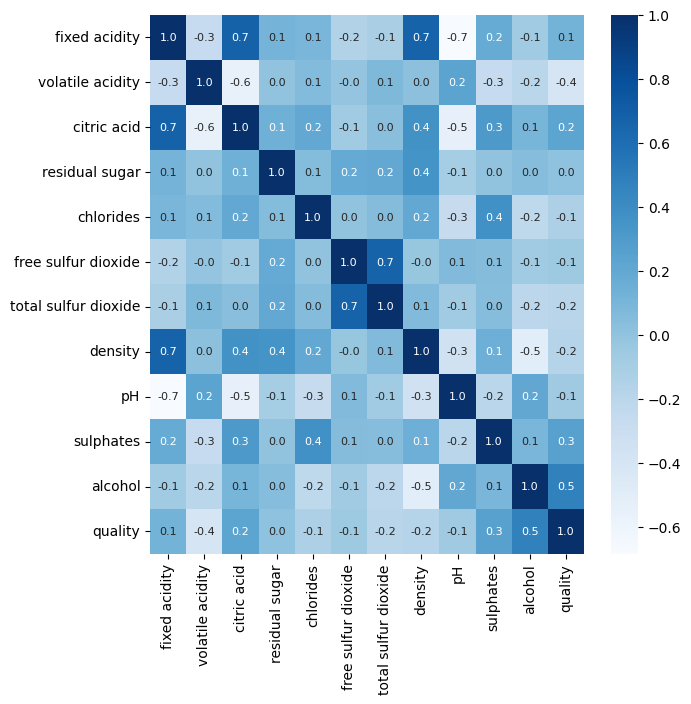

In [108]:
plot = plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,cmap='Blues',annot=True,fmt='.1f',annot_kws={'size':8})

In [109]:
dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


**Label Binarization**

In [110]:
dataset['quality'] = dataset['quality'].apply( lambda value_y : 1 if value_y >=7 else 0 )

In [111]:
dataset['quality'].value_counts()

,count
quality,
0,1382
1,217


0 --> Bad Quality

1 --> Good Quality

In [112]:
X = dataset.drop(columns ='quality',axis=1)
Y = dataset['quality']

In [113]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [114]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [115]:
X = np.array(X)
Y = np.array(Y)

In [116]:
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [117]:
print(Y)

[0 0 0 ... 0 0 0]


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2, stratify=Y)

In [119]:
print(X.shape, X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [120]:
model = RandomForestClassifier()

In [121]:
model.fit(X_train,Y_train)
training_data_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train,training_data_prediction)
print(training_accuracy*100)

100.0


In [122]:
test_data_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,test_data_prediction)
print(test_accuracy*100)

93.75


In [124]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0	)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if(prediction[0]==0):
  print('Bad Quality Wine')
else:
  print('Good Quality Wine')


Good Quality Wine
